<a href="https://colab.research.google.com/github/Kidar12/GDGoC_ML_Assignment-2/blob/main/Dataset_SHP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving SHP.csv to SHP.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

%matplotlib inline

df_shp = pd.read_csv('/content/SHP.csv')
df_shp.head(10)

,Unnamed: 0,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
1,1,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
2,2,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
3,3,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
4,4,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,inf,Candra Jacostaffey,True
5,5,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
6,6,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True
7,7,0008_02,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,True
8,8,0008_03,Europa,False,B/1/P,55 Cancri e,45.0,False,39.0,7295.0,589.0,110.0,124.0,Wezena Flatic,True
9,9,0009_01,Mars,False,F/1/P,TRAPPIST-1e,32.0,False,73.0,0.0,1123.0,0.0,113.0,Berers Barne,True


In [4]:
rm = ['Unnamed: 0', 'PassengerId']
df_shp.drop(rm, axis=1, inplace=True)
df_shp.head(10)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
1,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
2,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
3,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
4,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,inf,Candra Jacostaffey,True
5,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
6,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True
7,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,True
8,Europa,False,B/1/P,55 Cancri e,45.0,False,39.0,7295.0,589.0,110.0,124.0,Wezena Flatic,True
9,Mars,False,F/1/P,TRAPPIST-1e,32.0,False,73.0,0.0,1123.0,0.0,113.0,Berers Barne,True


In [5]:
df_shp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12138 entries, 0 to 12137
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   HomePlanet    11985 non-null  object
 1   CryoSleep     11955 non-null  object
 2   Cabin         11982 non-null  object
 3   Destination   11981 non-null  object
 4   Age           11993 non-null  object
 5   VIP           11963 non-null  object
 6   RoomService   12002 non-null  object
 7   FoodCourt     11991 non-null  object
 8   ShoppingMall  11964 non-null  object
 9   Spa           11985 non-null  object
 10  VRDeck        11975 non-null  object
 11  Name          11973 non-null  object
 12  Transported   12138 non-null  bool  
dtypes: bool(1), object(12)
memory usage: 1.1+ MB


In [6]:
num = ['RoomService', 'FoodCourt', 'ShoppingMall']

df_shp[num] = df_shp[num].apply(pd.to_numeric, errors='coerce')
df_shp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12138 entries, 0 to 12137
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    11985 non-null  object 
 1   CryoSleep     11955 non-null  object 
 2   Cabin         11982 non-null  object 
 3   Destination   11981 non-null  object 
 4   Age           11993 non-null  object 
 5   VIP           11963 non-null  object 
 6   RoomService   11933 non-null  float64
 7   FoodCourt     11915 non-null  float64
 8   ShoppingMall  11882 non-null  float64
 9   Spa           11985 non-null  object 
 10  VRDeck        11975 non-null  object 
 11  Name          11973 non-null  object 
 12  Transported   12138 non-null  bool   
dtypes: bool(1), float64(3), object(9)
memory usage: 1.1+ MB


In [7]:
df_shp.isna().sum()

,0
HomePlanet,153
CryoSleep,183
Cabin,156
Destination,157
Age,145
VIP,175
RoomService,205
FoodCourt,223
ShoppingMall,256
Spa,153


In [9]:
df_shp.dropna(inplace=True)
df_shp.isna().sum()

,0
HomePlanet,0
CryoSleep,0
Cabin,0
Destination,0
Age,0
VIP,0
RoomService,0
FoodCourt,0
ShoppingMall,0
Spa,0


In [10]:
df_shp.duplicated().sum()

2725

In [11]:
df_shp.drop_duplicates(inplace=True)
df_shp.duplicated().sum()

0

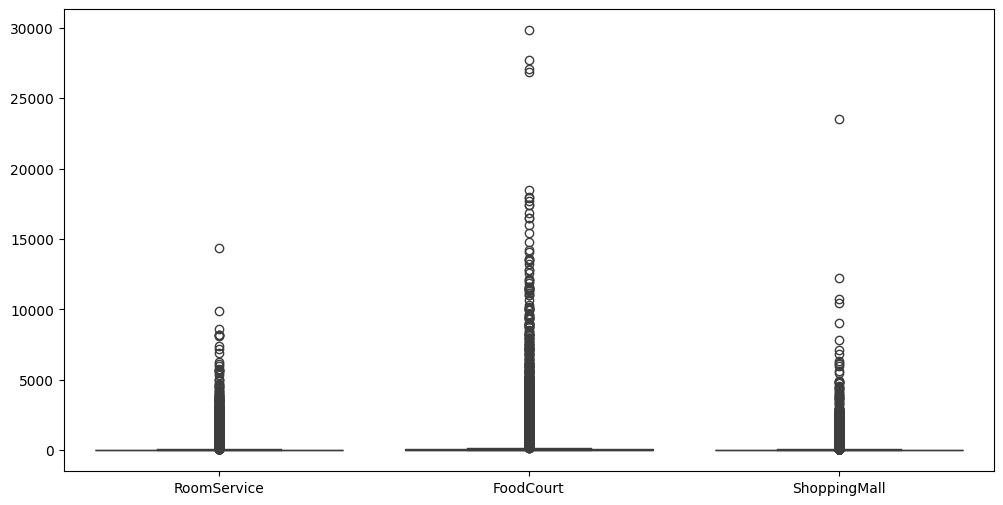

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_shp[num])
plt.show()

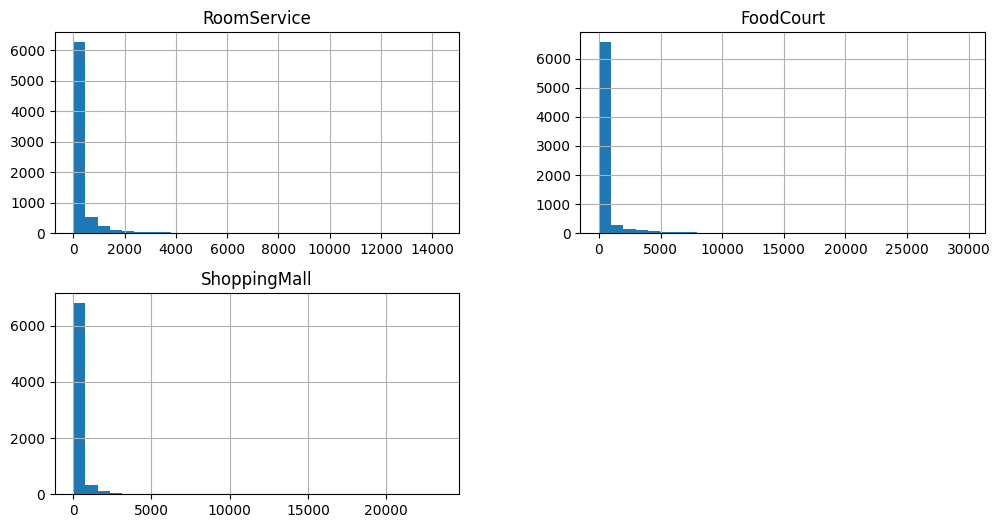

In [19]:
df_shp[num] = df_shp[num].replace([np.inf, -np.inf], np.nan)
df_shp.dropna(subset=num, inplace=True)

df_shp[num].hist(bins=30, figsize=(12, 6))
plt.show()

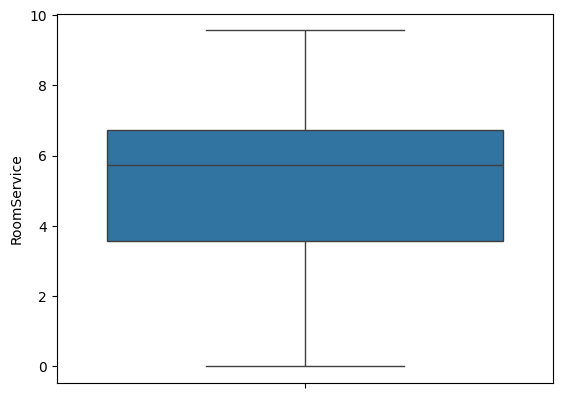

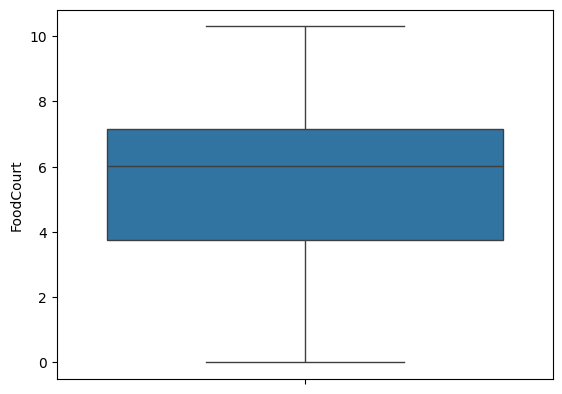

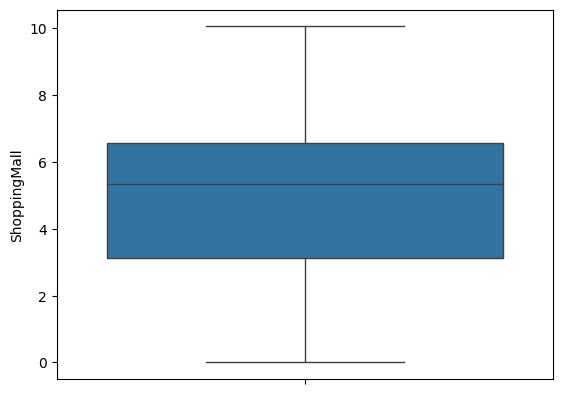

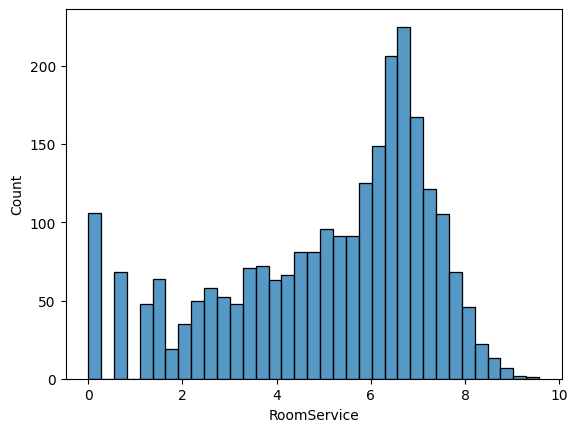

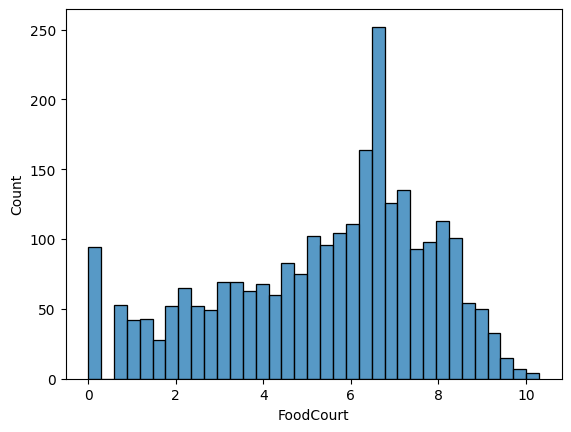

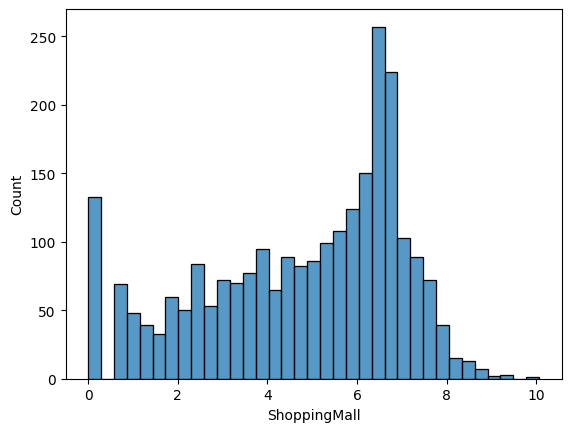

In [21]:
df_shp['RoomService'] = np.log(df_shp['RoomService'])
df_shp['FoodCourt'] = np.log(df_shp['FoodCourt'])
df_shp['ShoppingMall'] = np.log(df_shp['ShoppingMall'])

sns.boxplot(df_shp['RoomService'])
plt.show()

sns.boxplot(df_shp['FoodCourt'])
plt.show()

sns.boxplot(df_shp['ShoppingMall'])
plt.show()

sns.histplot(df_shp['RoomService'], bins=35)
plt.show()

sns.histplot(df_shp['FoodCourt'], bins=35)
plt.show()

sns.histplot(df_shp['ShoppingMall'], bins=35)
plt.show()

In [22]:
x = df_shp.drop('Transported', axis=1)
y = df_shp['Transported']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5872, 12), (1469, 12), (5872,), (1469,))

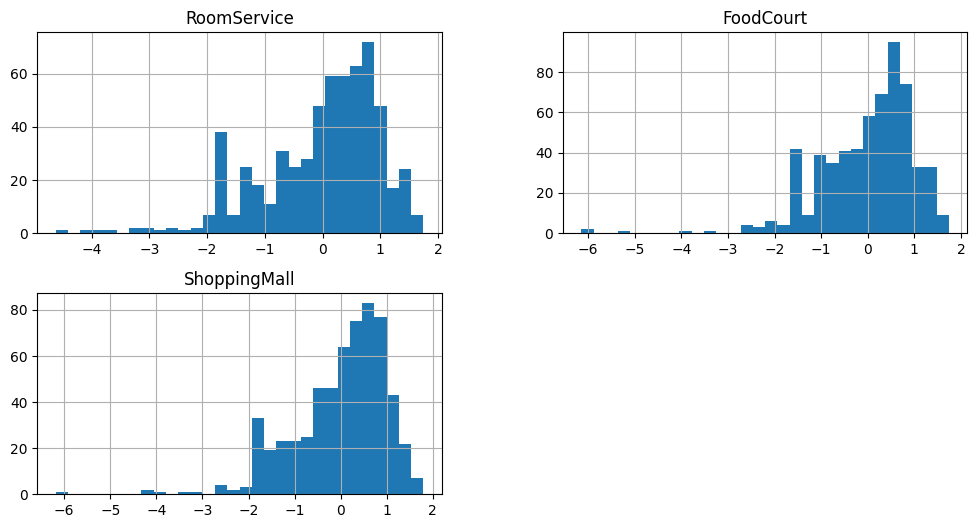

In [26]:
from sklearn.preprocessing import StandardScaler

x_train[num] = x_train[num].replace([np.inf, -np.inf], np.nan)
x_test[num] = x_test[num].replace([np.inf, -np.inf], np.nan)

x_train.dropna(subset=num, inplace=True)
x_test.dropna(subset=num, inplace=True)

for col in num:
    x_train[col] = x_train[col].apply(lambda x: np.log(x) if x > 0 else x)
    x_test[col] = x_test[col].apply(lambda x: np.log(x) if x > 0 else x)


scaler = StandardScaler()
x_train[num] = scaler.fit_transform(x_train[num])
x_test[num] = scaler.transform(x_test[num])

x_train[num].hist(bins=30, figsize=(12, 6))
plt.show()

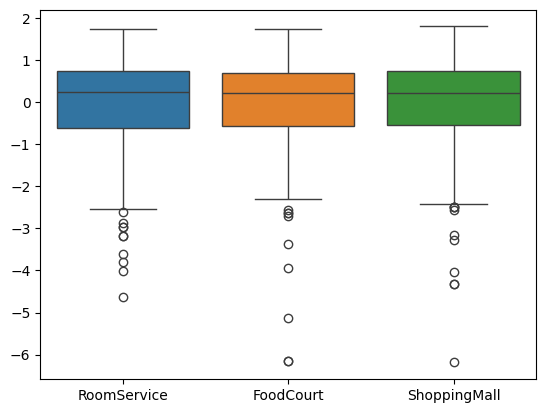

In [29]:
sns.boxplot(data=x_train[num])
plt.show()

In [30]:
x_train['RoomService'] = np.log(x_train['RoomService'])
x_train['FoodCourt'] = np.log(x_train['FoodCourt'])
x_train['ShoppingMall'] = np.log(x_train['ShoppingMall'])

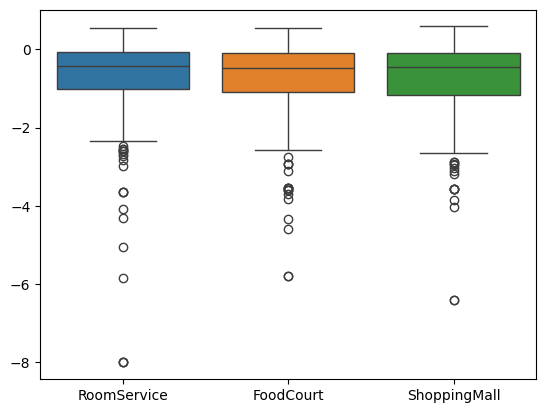

In [31]:
sns.boxplot(data=x_train[num])
plt.show()

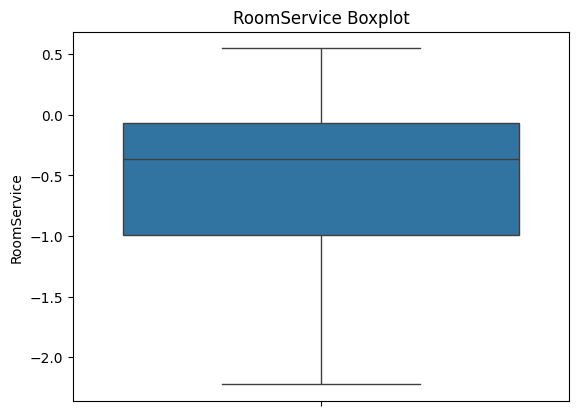

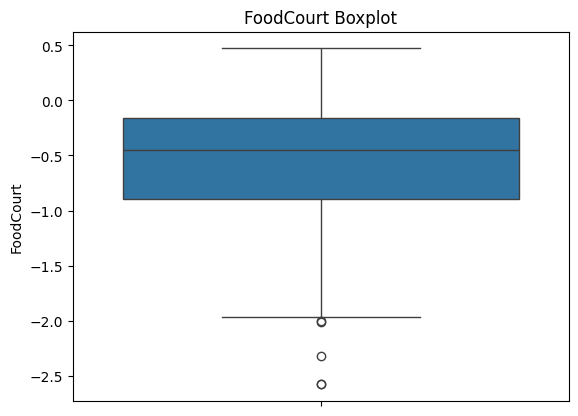

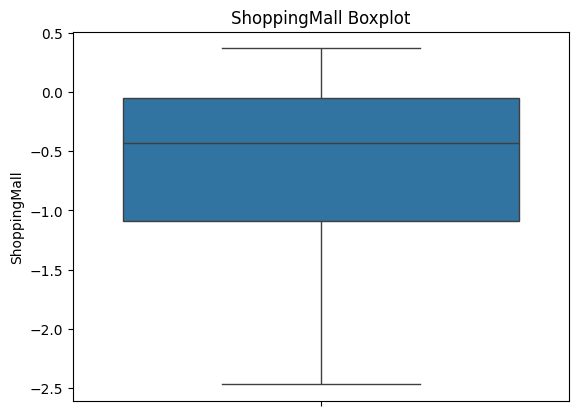

In [32]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

x_train = remove_outliers_iqr(x_train, 'RoomService')
x_train = remove_outliers_iqr(x_train, 'FoodCourt')
x_train = remove_outliers_iqr(x_train, 'ShoppingMall')

sns.boxplot(x_train['RoomService'])
plt.title('RoomService Boxplot')
plt.show()

sns.boxplot(x_train['FoodCourt'])
plt.title('FoodCourt Boxplot')
plt.show()

sns.boxplot(x_train['ShoppingMall'])
plt.title('ShoppingMall Boxplot')
plt.show()

In [35]:
x_train['RoomService'].skew(), x_train['FoodCourt'].skew(), x_train['ShoppingMall'].skew()

(-0.5633276311190877, -0.9589552297242468, -0.8042282149736336)

In [36]:
x_train['RoomService'].fillna(x_train['RoomService'].mean(), inplace=True)
x_test['RoomService'].fillna(x_test['RoomService'].mean(), inplace=True)

x_train['FoodCourt'].fillna(x_train['FoodCourt'].mean(), inplace=True)
x_test['FoodCourt'].fillna(x_test['FoodCourt'].mean(), inplace=True)

x_train['ShoppingMall'].fillna(x_train['ShoppingMall'].mean(), inplace=True)
x_test['ShoppingMall'].fillna(x_test['ShoppingMall'].mean(), inplace=True)

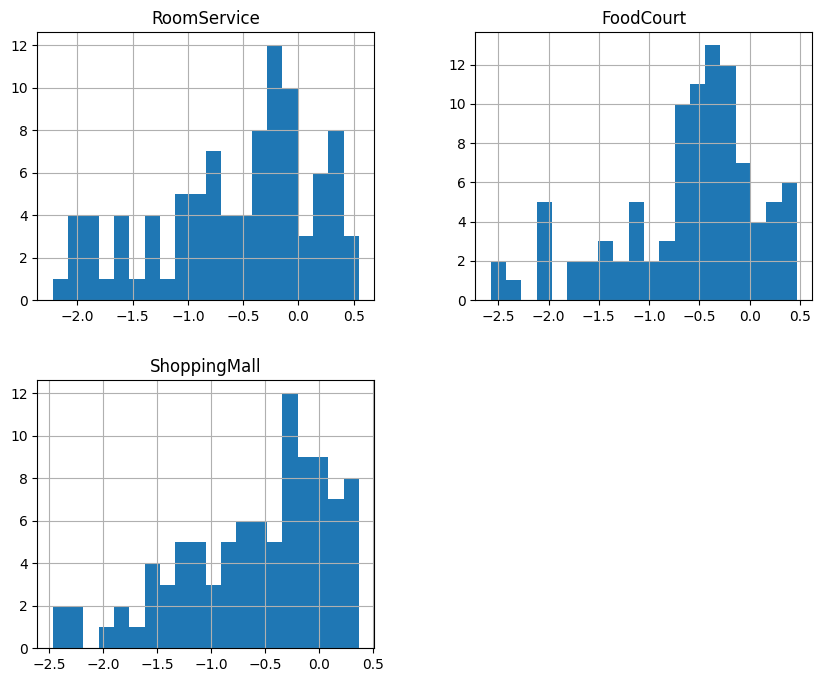

In [38]:
x_train[['RoomService', 'FoodCourt', 'ShoppingMall']].hist(bins=20, figsize=(10, 8))
plt.show()

In [39]:
print(x_test.isna().sum())

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64


In [41]:
categorical_cols = x_train.select_dtypes(include=['object']).columns

print('-'*50)
for col in categorical_cols:
    print(x_train[col].value_counts())
    print('-'*50)

--------------------------------------------------
HomePlanet
Mars      44
Earth     32
Europa    19
Name: count, dtype: int64
--------------------------------------------------
CryoSleep
False    93
-inf      2
Name: count, dtype: int64
--------------------------------------------------
Cabin
B/23/P      2
D/50/P      1
C/339/S     1
F/1223/P    1
F/1069/S    1
           ..
F/869/P     1
F/497/P     1
F/1787/P    1
F/1702/P    1
G/1479/P    1
Name: count, Length: 94, dtype: int64
--------------------------------------------------
Destination
TRAPPIST-1e      72
55 Cancri e      17
PSO J318.5-22     6
Name: count, dtype: int64
--------------------------------------------------
Age
34.0    8
18.0    7
32.0    5
33.0    5
30.0    4
37.0    3
23.0    3
40.0    3
27.0    3
38.0    3
21.0    3
24.0    3
43.0    3
26.0    3
14.0    2
17.0    2
51.0    2
55.0    2
22.0    2
45.0    2
19.0    2
13.0    2
35.0    2
20.0    2
41.0    2
29.0    2
39.0    1
54.0    1
57.0    1
61.0    1
49.0    1

In [46]:
df_shp = df_shp[df_shp['CryoSleep'] != -np.inf]
df_shp = df_shp[df_shp['VIP'] != np.inf]

In [48]:
categorical_cols = x_train.select_dtypes(include=['object']).columns

print('-'*50)
for col in categorical_cols:
    print(x_train[col].value_counts())
    print('-'*50)

--------------------------------------------------
HomePlanet
Mars      44
Earth     32
Europa    19
Name: count, dtype: int64
--------------------------------------------------
CryoSleep
False    93
-inf      2
Name: count, dtype: int64
--------------------------------------------------
Cabin
B/23/P      2
D/50/P      1
C/339/S     1
F/1223/P    1
F/1069/S    1
           ..
F/869/P     1
F/497/P     1
F/1787/P    1
F/1702/P    1
G/1479/P    1
Name: count, Length: 94, dtype: int64
--------------------------------------------------
Destination
TRAPPIST-1e      72
55 Cancri e      17
PSO J318.5-22     6
Name: count, dtype: int64
--------------------------------------------------
Age
34.0    8
18.0    7
32.0    5
33.0    5
30.0    4
37.0    3
23.0    3
40.0    3
27.0    3
38.0    3
21.0    3
24.0    3
43.0    3
26.0    3
14.0    2
17.0    2
51.0    2
55.0    2
22.0    2
45.0    2
19.0    2
13.0    2
35.0    2
20.0    2
41.0    2
29.0    2
39.0    1
54.0    1
57.0    1
61.0    1
49.0    1

In [50]:
x_train = pd.get_dummies(x_train, columns=categorical_cols, drop_first=True)
x_test = pd.get_dummies(x_test, columns=categorical_cols, drop_first=True)

x_train.head()

,RoomService,FoodCourt,ShoppingMall,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,Cabin_A/52/P,Cabin_A/6/S,Cabin_B/1/P,Cabin_B/158/S,...,Name_Unukath Alaxed,Name_Vanney Vandan,Name_Vindem Eneurordry,Name_Vuls Sidne,Name_Wales Tité,Name_Weet Pimne,Name_Weia Parbage,Name_Weid Waring,Name_Wezena Flatic,Name_Yos Stike
703,0.406365,-0.605692,0.128783,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11322,-0.293023,-0.170593,-0.701926,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
10627,-1.837327,-2.013719,-1.346818,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11185,-1.534956,0.281700,-1.572918,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1728,-1.264068,-0.919587,-0.254850,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [52]:
x_train.columns

Index(['RoomService', 'FoodCourt', 'ShoppingMall', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'CryoSleep_False', 'Cabin_A/52/P', 'Cabin_A/6/S',
       'Cabin_B/1/P', 'Cabin_B/158/S',
       ...
       'Name_Unukath Alaxed', 'Name_Vanney Vandan', 'Name_Vindem Eneurordry',
       'Name_Vuls Sidne', 'Name_Wales Tité', 'Name_Weet Pimne',
       'Name_Weia Parbage', 'Name_Weid Waring', 'Name_Wezena Flatic',
       'Name_Yos Stike'],
      dtype='object', length=317)

In [53]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

y_train

array([1, 1, 0, ..., 0, 1, 0])

In [54]:
print(f'Train Label  \n{pd.Series(y_train).value_counts()}')
print()
print(f'Test Label \n{pd.Series(y_test).value_counts()}')

Train Label  
1    2984
0    2888
Name: count, dtype: int64

Test Label 
1    768
0    701
Name: count, dtype: int64


In [55]:
x_train

,RoomService,FoodCourt,ShoppingMall,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,Cabin_A/52/P,Cabin_A/6/S,Cabin_B/1/P,Cabin_B/158/S,...,Name_Unukath Alaxed,Name_Vanney Vandan,Name_Vindem Eneurordry,Name_Vuls Sidne,Name_Wales Tité,Name_Weet Pimne,Name_Weia Parbage,Name_Weid Waring,Name_Wezena Flatic,Name_Yos Stike
703,0.406365,-0.605692,0.128783,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11322,-0.293023,-0.170593,-0.701926,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
10627,-1.837327,-2.013719,-1.346818,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11185,-1.534956,0.281700,-1.572918,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1728,-1.264068,-0.919587,-0.254850,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11380,-0.016318,-1.278738,-1.596497,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3351,0.150527,0.331261,-0.013879,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10524,-0.581764,-0.363054,-0.304355,False,True,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
9651,-1.386293,-1.996352,-1.490782,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [60]:
x_train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 318 columns):
 #    Column                     Non-Null Count  Dtype  
---   ------                     --------------  -----  
 0    RoomService                95 non-null     float64
 1    FoodCourt                  95 non-null     float64
 2    ShoppingMall               95 non-null     float64
 3    HomePlanet_Europa          95 non-null     bool   
 4    HomePlanet_Mars            95 non-null     bool   
 5    CryoSleep_False            95 non-null     bool   
 6    Cabin_A/52/P               95 non-null     bool   
 7    Cabin_A/6/S                95 non-null     bool   
 8    Cabin_B/1/P                95 non-null     bool   
 9    Cabin_B/158/S              95 non-null     bool   
 10   Cabin_B/162/P              95 non-null     bool   
 11   Cabin_B/216/P              95 non-null     bool   
 12   Cabin_B/23/P               95 non-null     bool   
 13   Cabin_B/246/P              95 non-n

In [61]:
x_train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 318 columns):
 #    Column                     Non-Null Count  Dtype  
---   ------                     --------------  -----  
 0    RoomService                95 non-null     float64
 1    FoodCourt                  95 non-null     float64
 2    ShoppingMall               95 non-null     float64
 3    HomePlanet_Europa          95 non-null     bool   
 4    HomePlanet_Mars            95 non-null     bool   
 5    CryoSleep_False            95 non-null     bool   
 6    Cabin_A/52/P               95 non-null     bool   
 7    Cabin_A/6/S                95 non-null     bool   
 8    Cabin_B/1/P                95 non-null     bool   
 9    Cabin_B/158/S              95 non-null     bool   
 10   Cabin_B/162/P              95 non-null     bool   
 11   Cabin_B/216/P              95 non-null     bool   
 12   Cabin_B/23/P               95 non-null     bool   
 13   Cabin_B/246/P              95 non-n

In [63]:
print("Train missing data", x_train.isna().sum().sum(), "\nTest missing data", x_test.isna().sum().sum())
print()
print("Train duplicated data", x_test.duplicated().sum(), "\nTest duplicated data", x_test.duplicated().sum())

Train missing data 0 
Test missing data 0

Train duplicated data 0 
Test duplicated data 0
